In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 0, 'Height')

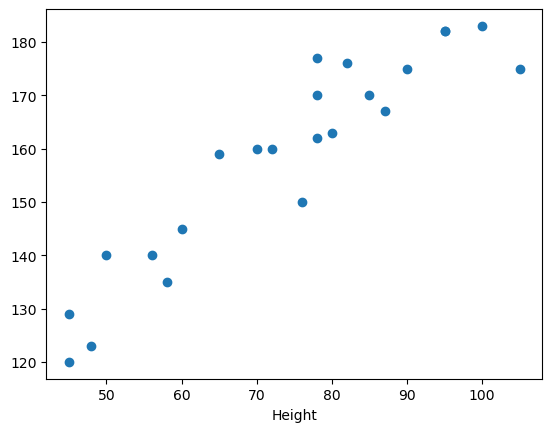

In [6]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.xlabel("Height")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [11]:
# Divide our dataset into independent and dependent features
x=df[['Weight']]  ## independent feature
y=df['Height']   # dependent features  

In [14]:
x.shape,y.shape

((23, 1), (23,))

In [15]:
# Further dicide the dataset into train and test
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

In [19]:
y_train.shape,y_test.shape

((18,), (5,))

In [20]:
# stanaard Scaling on the train and test data

from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [23]:
x_train=scaler.fit_transform(x_train)

In [24]:
x_test=scaler.transform(x_test)

In [25]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [26]:
# Model training 
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
#Traning the train data
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
regressor.intercept_

157.5

In [30]:
regressor.coef_

array([17.03440872])

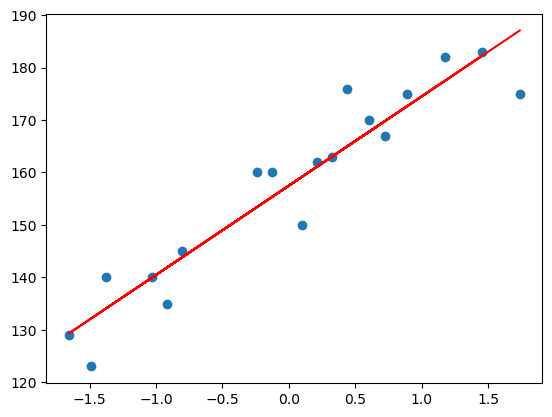

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

## predication of train data
1. predicated height output= intercept+coef_(Weights)
2. y_pred_train=157.5 + 17.03(x_train)

## prediction of test data
1. predicated height output=intercept + coef_(weights)
2.y_pred_test=157.5 + 17.03(x_test)

In [34]:
## predication for test data
y_pred_test=regressor.predict(x_test)

In [35]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Performance metrics MAE,MSE,RMSE


In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
MSE=mean_squared_error(y_test,y_pred_test)
MAE=mean_absolute_error(y_test,y_pred_test)
RMSE=np.sqrt(MSE)
print(MSE)
print(MAE)
print(RMSE)

109.77592599051654
9.822657814519227
10.477400726827076


## Accuracy of the model R squared and Adjusted R squared
## R square
Formula
**R^2=1-SSR/SST**

- R^2  = Accuracy of the model
- SSR  = sum of squares of residuals
- SST = total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score=r2_score(y_test,y_pred_test)
score

0.7769869860423441

## Adjusted R square
**Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]**

where:
- R2: The R2 of the model
- n:  The number of Observations
- k:  the number of predictor variables    

In [44]:
# Display adjusted R squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231254

In [45]:
scaler

StandardScaler()

In [46]:
regressor

LinearRegression()